In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


n_train = 200  # samples for training
n_test = 200  # samples for testing
n_averages = 25  # how often to repeat classification
n_features_max = 200  # maximum number of features
step = 4  # step size for the calculation


def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=2, centers=[[-2,0], [2,0]])

    # add non-discriminative features
    if n_features > 2:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y





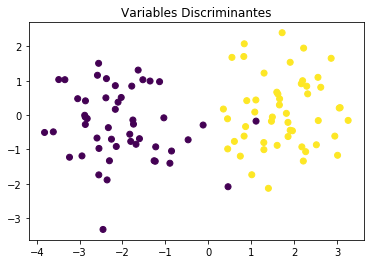

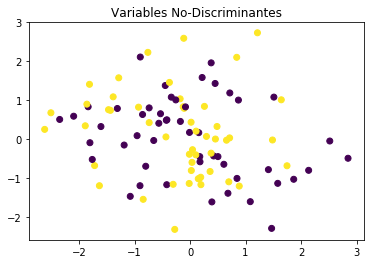

In [2]:
X, y = generate_data(100, 4)
plt.title('Variables Discriminantes')
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
plt.title('Variables No-Discriminantes')
plt.scatter(X[:,2],X[:,3],c=y)
plt.show()

# acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=.85).fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

    
features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="LDA con shrinkage", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="LDA", color='gold')

plt.xlabel('dimensión / número de muestras')
plt.ylabel('Clasificación correcta')

plt.legend(loc=1, prop={'size': 12})
plt.suptitle('LDA vs. shrinkage LDA (2 variables discriminantes)')
plt.show()